# Getting Python


For this course, we are going to use Jupyter notebook as our environment for developing Python code.
refer to https://jupyter.readthedocs.io/en/latest/content-quickstart.html on the instructions how to install it, the easiest way is to install from Anaconda (https://www.anaconda.com/download/) website, make sure you install with Python 3.6.

Also, it is good for the students who are not familiar with python (or they need a quick refreshment) to follow Jim Bagrow tutorial http://bagrow.com/ds1/whirlwindtourpython/00-Title.html. 

All the assignments to be written in Python 3.6 and can be run using Jupyter on one of the following Internet browsers (Chrome, Safari or Firefox), these are the browsers that officially supported by jupyter.

<u> Note: for this assignment, submit your local copy of this page, running on IPython. Submit the file to Blackboard under Assignment3 using this file format:</u> <b>Yourfirstname_lastname_Assignment3.ipynb</b> 

#### <b>Deadline</b>: <u>Friday, Oct-18-2019 11:59 PM.</u>

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd

# Assignment 3 -- Part 1

In this part, you will use SVM from sklearn to classify non-linearly sperable datasets. 

Hint: Refer to the example in sklearn http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html, you can use this code or part of it in your solutions.

Load (using load_breast_cancer) datasets from sklearn (datasets.load_breast_cancer()):



In [3]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
print(data['data'].shape)

(569, 30)


### Part 1, Q1  --  [25 pts]

1. In this question, you need to find the best SVM kernel that fit the data. Use built-in SVM functions from scikit learn Library. Evaluate 'linear', 'poly', 'rbf', 'sigmoid' Kernels using the default parameters as they aren't biased towards one of the kernels. Remember that in order to evaluate kernels or any hyper param you need to use cross-validation method. use k=50 for this question. Comment on the results.

2. Which scoring metric you would like to use? justify your answer.

Note: You can use built-in scikit learn function for this question and all other questions in this assignment else it is mentioned not to use it.

In [4]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.model_selection import cross_val_score
#end import
#extract features and target vectors from input dataset
X = data['data']
y = data['target']
#split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
#scale data
scaler = StandardScaler()
X_trainScaled=scaler.fit_transform(X_train)
X_testScaled=scaler.fit_transform(X_test)
#create models with each type of kernel
models = (svm.SVC(kernel='linear', C=1.0),
         svm.SVC(kernel='sigmoid', gamma ='auto', C=1.0),
         svm.SVC(kernel='poly', gamma ='auto', C=1.0),
         svm.SVC(kernel='rbf', gamma ='auto', C=1.0))
#fit the models
models = (clf.fit(X_trainScaled,y_train) for clf in models)
#evaluate the models using cross validation
for model in models:
    print(model.kernel)
    prediction=model.predict(X_testScaled)
    metrics.accuracy_score(prediction,y_test)
    scores = cross_val_score(model, X_testScaled, y_test, cv=39)
    print("Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))


linear
Accuracy: 0.957 (+/- 0.223)
sigmoid
Accuracy: 0.974 (+/- 0.178)
poly
Accuracy: 0.893 (+/- 0.325)
rbf
Accuracy: 0.966 (+/- 0.202)


## The sigmoid kernel is both the most accurate and has the lowest variance. Accuracy and variance are quantified by taking the average over all splits, this ensures that each random test/train split is weighted equally in evaluation of the algorithm.

### Part 1, Q2  --  [25 pts]

Using random search, what are the optimum hyperparameters for each kernel? 
For this question, use only a few numbers of iterations when you do a random search (no need to run for long hours). Add to that, also be smart when you select the scale for the C, gamma and class_weight so that you can find the best params. Which SVM kernel achieving the highest performance?

Note: You can use RandomizedSearchCV function from the scikit learn library.

In [53]:
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from time import time
from scipy.stats import expon
import random
# Utility function to report best scores
def report(results, n_top=20):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# specify parameters and distributions to sample from
param_dist = {"C": expon(scale=1000),
             "gamma": expon(scale=1),
             "kernel":['linear','sigmoid','poly','rbf'],
             "class_weight":["balanced",None]}

# run randomized search
n_iter_search = 20
model = svm.SVC()
random_search = RandomizedSearchCV(model, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5, iid=False)

start = time()
random_search.fit(X_testScaled, y_test)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 0.10 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.939 (std: 0.044)
Parameters: {'C': 126.79642526433743, 'class_weight': None, 'gamma': 1.2421520958767756, 'kernel': 'poly'}

Model with rank: 1
Mean validation score: 0.939 (std: 0.044)
Parameters: {'C': 648.9225243038372, 'class_weight': None, 'gamma': 0.8657000275622995, 'kernel': 'poly'}

Model with rank: 1
Mean validation score: 0.939 (std: 0.044)
Parameters: {'C': 2680.42569998593, 'class_weight': None, 'gamma': 0.5690521799826749, 'kernel': 'poly'}

Model with rank: 1
Mean validation score: 0.939 (std: 0.044)
Parameters: {'C': 95.41860399645188, 'class_weight': 'balanced', 'gamma': 0.5484856526147884, 'kernel': 'poly'}

Model with rank: 1
Mean validation score: 0.939 (std: 0.044)
Parameters: {'C': 805.3687111275968, 'class_weight': None, 'gamma': 0.3254499547051629, 'kernel': 'poly'}

Model with rank: 6
Mean validation score: 0.930 (std: 0.059)
Parameters: {'C': 

### (Graduate students only)

### Part 1, Q3  --  [10 pts]

Randomly select 20% of the data for testing and the rest for training.

Plot the decision surface for "worse SVM", "best SVM" found in part b and report the performance for each, you may use built-in sklean functions for visualization.

Note: For visualization you need to work on two-dimensional feature space. To do so, use PCA to reduce the number of the features to 2. 

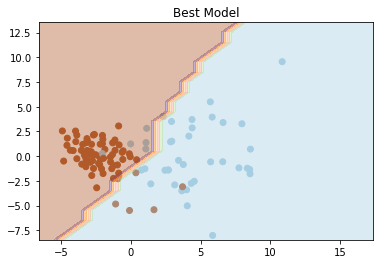

poly
0.9035087719298246


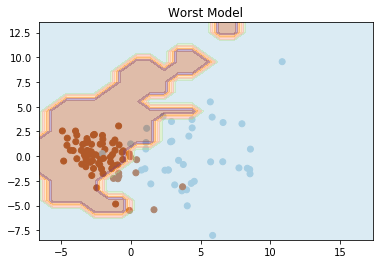

rbf
0.8859649122807017


In [82]:
#decision boundary code source: https://stackoverflow.com/questions/19054923/plot-decision-boundary-matplotlib
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
bestModel = svm.SVC(kernel='poly', gamma = 1.2421520958767756, C=126.79642526433743)
worstModel = svm.SVC(kernel='rbf',gamma=1.0619260683468157,C=107.26480555937796,class_weight='balanced')
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_trainScaled)
X_reduced_train = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
pca2 = PCA(n_components=2)
principalComponents2 = pca2.fit_transform(X_testScaled)
X_reduced_test = pd.DataFrame(data = principalComponents2, columns = ['PC1', 'PC2'])
models = [bestModel,worstModel]
title = ["Best Model","Worst Model"]
i = 0
for model in models:
    model.fit(X_reduced_train,y_train)
    # X - some data in 2dimensional np.array
    h=1
    x_min, x_max = X_reduced['PC1'].min() - 1, X_reduced['PC1'].max() + 1
    y_min, y_max = X_reduced['PC2'].min() - 1, X_reduced['PC2'].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # here "model" is your model's prediction (classification) function
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) 
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    # Plot also the training points
    plt.scatter(X_reduced_test['PC1'], X_reduced_test['PC2'], c=y_test, cmap=plt.cm.Paired)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired,alpha=.4)
    plt.title(title[i])
    i+=1
    plt.show()
    print(model.kernel)
    prediction=model.predict(X_reduced_test)
    print(metrics.accuracy_score(prediction,y_test))

# Assignment 3 -- Part 2

In this part, you will use the decision tree from sklearn to classify non-linearly separable datasets. 


Load Car Evaluation Data Set from https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data, read the dataset description and get familiar with the dataset attributes https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.names

This dataset includes strings, you might need to convert them to numbers, in this case, you might need to use methods like preprocessing.LabelEncoder(). 


### Part 2, Q1-- [25 pts]

Use the decision tree to classify the dataset (evaluate cars to one of the four classes unacc, acc, good, v-good). Use cross-validation while reporting your results. You can use sklearn.tree.DecisionTreeClassifier.


### Part 1, Q2 [25 pts]

What is the optimum min_samples_split (The minimum number of samples required to split an internal node), does it make sense? Why?




### (Graduate students only)

### Part 1, Q3 [15 pts]

Implement random forest classifier by defining multiple (DecisionTreeClassifier)'s from sklearn. You can use the max_features from DecisionTreeClassifier. Lastly, compare your results to RandomForestClassifier from sklearn.

Note: In this part implement the bagging/ensemble by yourself without calling built-in functions from sklearn (you may still use RandomForestClassifier from sklearn with max_features).
